In [2]:
import matplotlib.pyplot as plt
from simtk.openmm import app
from simtk import openmm, unit
from openeye import oechem
from sys import stdout
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import sys
import string
from rdkit import Chem
import lxml.etree as etree

from simtk.openmm.app import element as elem
from simtk.openmm.app import Topology

import os
import math
import copy
import re
import numpy
import random

from simtk import openmm, unit

import time

import itertools

from rdkit import Chem


import sys
import io
from IPython.nbformat import current
import openeye.oechem
import openeye.oeomega
import openeye.oequacpac

from openeye import oechem, oequacpac
from openeye.oechem import *
from openeye.oedepict import *
from IPython.core.display import Image, display
from openforcefield.typing.engines.smirnoff import forcefield_rdk
from openforcefield.typing.engines import smirnoff
#from openforcefield import *
from openforcefield.utils import *
def RetrieveMol2Block(fileLikeObject, delimiter="@<TRIPOS>MOLECULE"):
    """generator which retrieves one mol2 block at a time
    """
    mol2 = []
    for line in fileLikeObject:
        if line.startswith(delimiter) and mol2:
            yield "".join(mol2)
            mol2 = []
        mol2.append(line)
    if mol2:
        yield "".join(mol2)
# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/utils/")
# #from utils import *
# from utils import get_data_filename, extractPositionsFromOEMol, generateTopologyFromOEMol, extractPositionsFromRDKMol

# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/typing/engines/smirnoff/")
# from forcefield import *
# from forcefield_utils import *

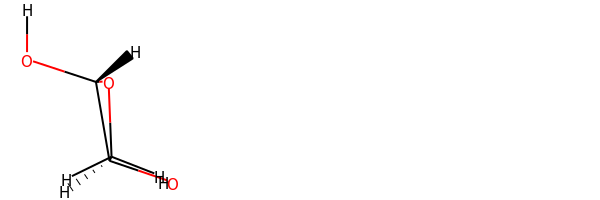

AttributeError: 'Mol' object has no attribute 'updatePropertyCache'

In [26]:
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
ff_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/forcefield/smirnoff99Frosst.ffxml"

mol = Chem.MolFromMol2File(mol_filename, sanitize = True, removeHs = False)
x = Draw.MolsToGridImage([mol])
display(x)
m1 = Chem.MolFromSmiles('Cc1ccccc1')
print(m1)
print(m1.updatePropertyCache())
print(mol.updatePropertyCache())
print(Chem.MolToMolBlock(mol))
positions_rdk = extractPositionsFromRDKMol(mol)
#print positions

# atoms = mol.GetAtoms()
# print atoms[0].GetPropsAsDict()
# #print list(atoms[0].GetPropNames())
# atoms[0].SetDoubleProp("PartialCharge", 0.3)
# print atoms[0].GetPropsAsDict()["PartialCharge"]
# [float(a.GetPropsAsDict()["_TriposPartialCharge"]) if "_TriposPartialCharge" in a.GetPropsAsDict() else 0.0 for a in mol.GetAtoms()]

In [3]:

Chem.Draw.MolsToGridImage([mol],molsPerRow=1)


#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)


# Create the OpenMM system
topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(mol)
system_rdk = forcefield.createSystem(topology_rdk, [mol])

#g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology, topology, system, system, positions)

[*:1]~[*:2]
[#6X4:1]-[#6X4:2]
[#6X4:1]-[#6X3:2]
[#6X4:1]-[#6X3:2]=[#8X1+0]
[#6X3:1]-[#6X3:2]
[#6X3:1]:[#6X3:2]
[#6X3:1]=[#6X3:2]
[#6:1]-[#7:2]
[#6X3:1]-[#7X3:2]
[#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0]
[#6X3:1](=[#8X1+0])-[#7X3:2]
[#6X3:1]-[#7X2:2]
[#6X3:1]:[#7X2,#7X3+1:2]
[#6X3:1]=[#7X2,#7X3+1:2]
[#6:1]-[#8:2]
[#6X4:1]-[#8X2H0:2]
[#6X3:1]-[#8X2:2]
[#6X3:1]-[#8X2H1:2]
[#6X3a:1]-[#8X2H0:2]
[#6X3:1](=[#8X1])-[#8X2H0:2]
[#6:1]=[#8X1+0,#8X2+1:2]
[#6X3:1](~[#8X1])~[#8X1:2]
[#6X3:1]:[#8X2+1:2]
[#6X2:1]-[#6:2]
[#6X2:1]-[#6X4:2]
[#6X2:1]=[#6X3:2]
[#6:1]#[#7:2]
[#6X2:1]#[#6X2:2]
[#6X2:1]-[#8X2:2]
[#6X2:1]-[#7:2]
[#6X2:1]=[#7:2]
[#6X2:1]=[#16:2]
[#7:1]-[#7:2]
[#7X3:1]-[#7X2:2]
[#7X2:1]-[#7X2:2]
[#7:1]:[#7:2]
[#7:1]=[#7:2]
[#7:1]#[#7:2]
[#7:1]-[#8X2:2]
[#7:1]~[#8X1:2]
[#8X2:1]-[#8X2:2]
[#16:1]-[#6:2]
[#16:1]-[#1:2]
[#16:1]-[#16:2]
[#16:1]-[#9:2]
[#16:1]-[#17:2]
[#16:1]-[#35:2]
[#16:1]-[#53:2]
[#16X2,#16X1-1,#16X3+1:1]-[#6X4:2]
[#16X2,#16X1-1,#16X3+1:1]-[#6X3:2]
[#16X2:1]-[#7:2]
[#16X2:1]-[#8X2:2]
[#16X2

In [4]:
# Load molecule using OpenEye tools
mol = oechem.OEGraphMol()
ifs = oechem.oemolistream(mol_filename)
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
ifs.SetFlavor( oechem.OEFormat_MOL2, flavor)
oechem.OEReadMolecule(ifs, mol )
oechem.OETriposAtomNames(mol)

# Get positions in OpenMM-compatible format
positions_oe = extractPositionsFromOEMol(mol)
#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield.ForceField(ff_filename)


# Create the OpenMM system
topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(mol)
system_oe = forcefield.createSystem(topology_oe, [mol])

g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, skip_assert = True)






Num (type) 	 Num (type) 	 Num (type) 	 Num (type) 	 per 	 phase 	 k0
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   3 ( O1)- 	 3.000000 	 0.000000 	 0.652704 
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.652704 
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   9 ( H4)- 	 3.000000 	 0.000000 	 0.669440 
  0 ( C1)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3.000000 	 0.000000 	 0.669440 
  0 ( C1)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 1.000000 	 0.000000 	 1.046000 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   1 ( C2)- 	 3.000000 	 0.000000 	 1.602472 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   1 ( C2)- 	 2.000000 	 180.000000 	 0.418400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.418400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   5 ( O3)- 	 2.000000 	 180.000000 	 3.556400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   5 ( O3)- 	 1.000000 	 180.000000 	 5.648400 
  0 ( C1)-   3 ( O1)- 	 2 ( C3)- 	   9 ( H4)- 	 3.000000 	 0.000000 	 1.603867 
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)-

AlkEthOH_r0
     RDKi


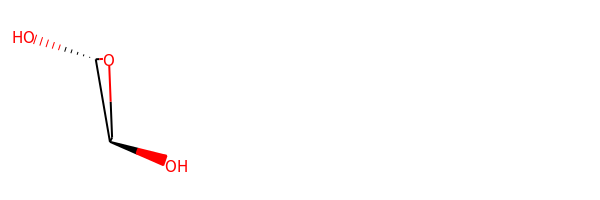

In [5]:

def getNthmol(n):
    counter  = 0
    for i in RetrieveMol2Block(open(mol_filename, "r")):
        if counter == n:
            return i
        counter += 1
        
mol2 = getNthmol(14)
mol2 = getNthmol(0)




# print(mol2)

rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = True)

print (Chem.MolToMolBlock(rdkmol)[0:21])
# Chem.Kekulize(rdkmol)
rdkmol = Chem.Mol(rdkmol)
x = Draw.MolsToGridImage([rdkmol], kekulize = False)
display(x)
    

bond
29964.783608035767 kJ/mol 29964.783608035767 kJ/mol True
angle
12.021409253648924 kJ/mol 12.021409253648924 kJ/mol True
nb
46.05461517642205 kJ/mol 43.19435349891394 kJ/mol False
torsion
46.60303346889985 kJ/mol 46.60303346889985 kJ/mol True
30069.462665934734 kJ/mol 30066.602404257228 kJ/mol

DrugBank_364
     RDK


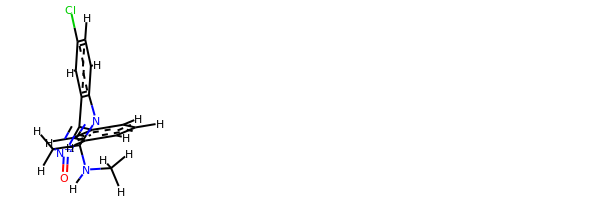

--------
bond
22.121336539749173 kJ/mol 14.955325578782775 kJ/mol False
angle
50.81730035962141 kJ/mol 56.395072621196434 kJ/mol False
nb
0.9199423531357339 kJ/mol -0.1674624830614861 kJ/mol False
torsion
6.846525946790031 kJ/mol 28.69469028358646 kJ/mol False
80.70510519929634 kJ/mol 99.8776260005042 kJ/mol

DrugBank_1543
     RD


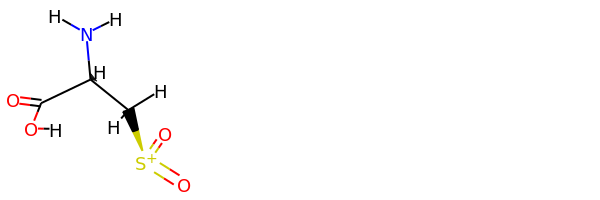

--------
bond
36.68553447190298 kJ/mol 36.71870666926899 kJ/mol False
angle
87.77439433962951 kJ/mol 87.77337383179123 kJ/mol False
nb
1.4768410072644134 kJ/mol 1.4768410072644134 kJ/mol True
torsion
21.98536638877206 kJ/mol 21.98519565720451 kJ/mol False
147.92213620756897 kJ/mol 147.95411716552917 kJ/mol

DrugBank_1800
     RD


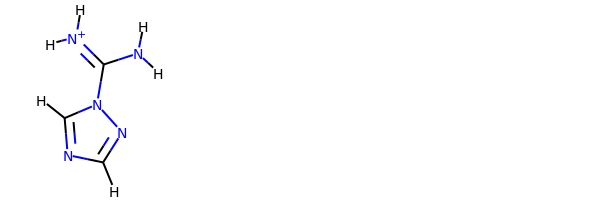

--------
bond
11.724343006813776 kJ/mol 11.724343006813776 kJ/mol True
angle
40.14816650649524 kJ/mol 40.14816650649524 kJ/mol True
nb
9.748261628391385 kJ/mol 9.748261628391385 kJ/mol True
torsion
16.168414222156553 kJ/mol 16.16841422215655 kJ/mol False
77.78918536385696 kJ/mol 77.78918536385694 kJ/mol

DrugBank_1900
     RD


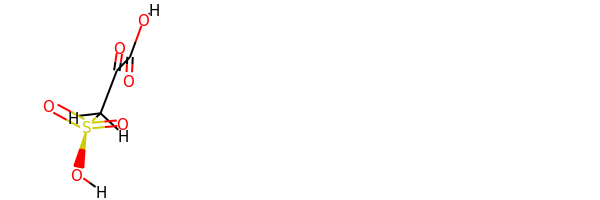

--------
bond
27.244075374294663 kJ/mol 27.21646580655409 kJ/mol False
angle
33.97153223488364 kJ/mol 34.0137306880037 kJ/mol False
nb
6.170430617144275 kJ/mol 6.170430617144275 kJ/mol True
torsion
65.10010915722539 kJ/mol 81.83613743378412 kJ/mol False
132.48614738354797 kJ/mol 149.23676454548618 kJ/mol

DrugBank_2029
     RD


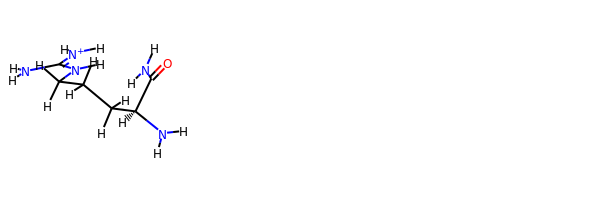

--------
bond
41.90370436315399 kJ/mol 41.90370436315399 kJ/mol True
angle
80.49804847656618 kJ/mol 80.49804847656618 kJ/mol True
nb
81.08324528905254 kJ/mol 81.08324528905254 kJ/mol True
torsion
8.066930905144714 kJ/mol 8.066930905144716 kJ/mol False
211.55192903391742 kJ/mol 211.55192903391745 kJ/mol

DrugBank_2087
     RD


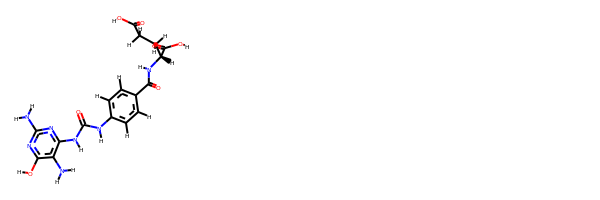

--------
bond
29.942412908103822 kJ/mol 29.942412908103822 kJ/mol True
angle
16.52086976701568 kJ/mol 16.52086976701568 kJ/mol True
nb
35.94940128639869 kJ/mol 35.94940128639869 kJ/mol True
torsion
77.5284429056739 kJ/mol 77.52844253486008 kJ/mol False
159.94112686719208 kJ/mol 159.94112649637827 kJ/mol

DrugBank_2344
     RD


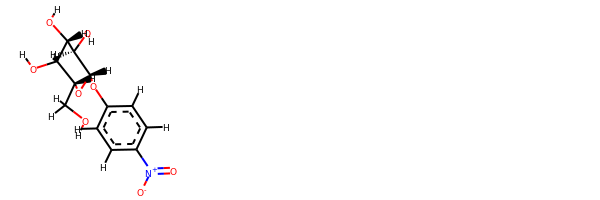

--------
bond
10.372495557147028 kJ/mol 10.372495557147028 kJ/mol True
angle
49.72995488418107 kJ/mol 49.72995488418107 kJ/mol True
nb
-3.618039112811771 kJ/mol -3.05280577289758 kJ/mol False
torsion
8.744893704273284 kJ/mol 8.744893704273284 kJ/mol True
65.22930503278961 kJ/mol 65.7945383727038 kJ/mol

DrugBank_2397
     RD


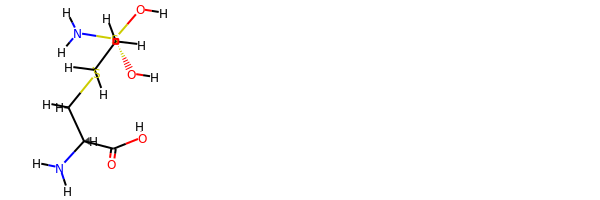

--------
bond
40.88182318035492 kJ/mol 40.90805602150676 kJ/mol False
angle
55.061116610573826 kJ/mol 55.10320058099169 kJ/mol False
nb
60.12916021071532 kJ/mol 60.12916021071532 kJ/mol True
torsion
83.94833539263557 kJ/mol 100.68436831719187 kJ/mol False
240.02043539427964 kJ/mol 256.82478513040564 kJ/mol

DrugBank_2450
     RD


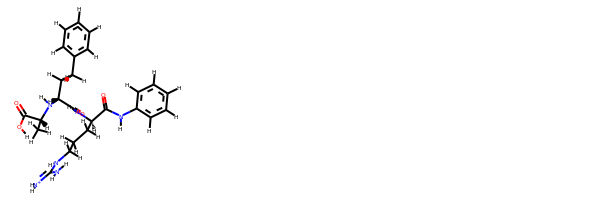

--------
bond
33.58069187418279 kJ/mol 33.58069187418279 kJ/mol True
angle
109.10236007224482 kJ/mol 109.10236007224482 kJ/mol True
nb
70.97082953416353 kJ/mol 71.49532163134039 kJ/mol False
torsion
87.4452383536624 kJ/mol 87.4452383536624 kJ/mol True
301.09911983425354 kJ/mol 301.6236119314304 kJ/mol

DrugBank_2543
     RD


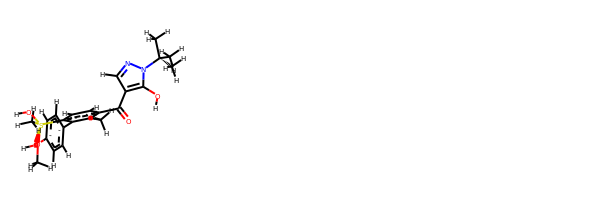

--------
bond
43.510118946162784 kJ/mol 36.343954235741116 kJ/mol False
angle
149.26242009263885 kJ/mol 154.84546690456062 kJ/mol False
nb
16.21326215440892 kJ/mol 12.773386677502593 kJ/mol False
torsion
75.79931020524586 kJ/mol 97.75960154215542 kJ/mol False
284.7851113984564 kJ/mol 301.7224093599597 kJ/mol

DrugBank_2567
     RD


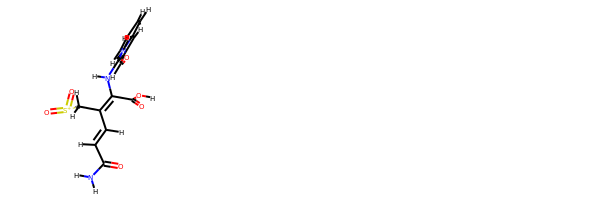

--------
bond
85815.84400421326 kJ/mol 85815.85541147128 kJ/mol False
angle
185.081182668257 kJ/mol 185.12339823534256 kJ/mol False
nb
1449.4265434197414 kJ/mol 1449.4265434197414 kJ/mol True
torsion
48.82721279526816 kJ/mol 65.56324122637862 kJ/mol False
87499.17894309653 kJ/mol 87515.96859435274 kJ/mol

DrugBank_2798
     RD


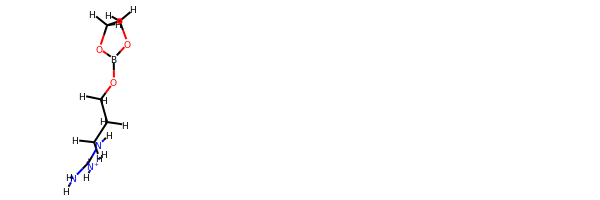

--------
bond
46.51358623402871 kJ/mol 34.79646437451488 kJ/mol False
angle
142.06600410468397 kJ/mol 142.70210790039758 kJ/mol False
nb
4.16159613161081 kJ/mol 4.16159613161081 kJ/mol True
torsion
16.801957666432106 kJ/mol 38.94044817970358 kJ/mol False
209.54314413675561 kJ/mol 220.6006165862269 kJ/mol

DrugBank_3090
     RD


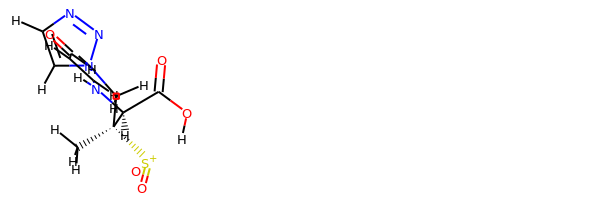

--------
bond
23.5056831262206 kJ/mol 23.518835490627012 kJ/mol False
angle
9.282259512570723 kJ/mol 9.324657871383964 kJ/mol False
nb
2.988248460501241 kJ/mol 2.988248460501241 kJ/mol True
torsion
21.262134241511696 kJ/mol 37.998160563111945 kJ/mol False
57.038325340804256 kJ/mol 73.82990238562417 kJ/mol

DrugBank_3267
     RD


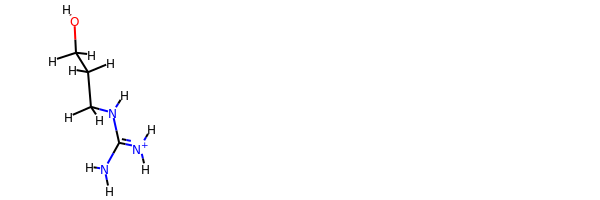

--------
bond
46.51358623402871 kJ/mol 34.79646437451488 kJ/mol False
angle
142.06600410468397 kJ/mol 142.70210790039758 kJ/mol False
nb
4.16159613161081 kJ/mol 4.16159613161081 kJ/mol True
torsion
16.801957666432106 kJ/mol 38.94044817970358 kJ/mol False
209.54314413675561 kJ/mol 220.6006165862269 kJ/mol

DrugBank_3448
     RD


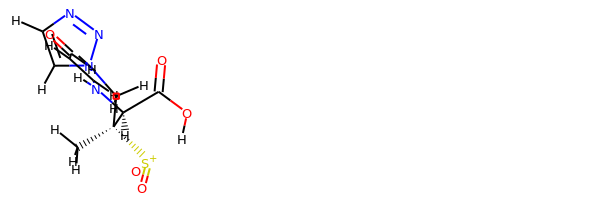

--------
bond
29.72626943787525 kJ/mol 28.031110767965544 kJ/mol False
angle
41.72776142786802 kJ/mol 41.779215230902274 kJ/mol False
nb
10.300308666885535 kJ/mol 11.56938204897643 kJ/mol False
torsion
47.90530439154777 kJ/mol 8.081824290455277 kJ/mol False
129.65964392417658 kJ/mol 89.46153233829952 kJ/mol

DrugBank_3505
     RD


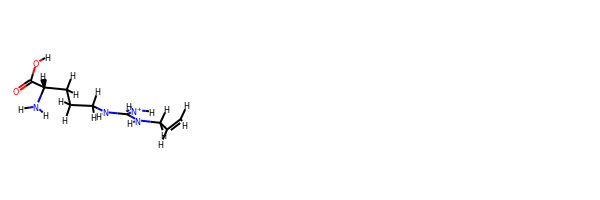

--------
bond
24.341746458095827 kJ/mol 24.341503006148834 kJ/mol False
angle
37.98741118739815 kJ/mol 38.03009434494098 kJ/mol False
nb
10.426555795009941 kJ/mol 10.426555795009941 kJ/mol True
torsion
24.81057304433263 kJ/mol 41.546600816722844 kJ/mol False
97.56628648483655 kJ/mol 114.3447539628226 kJ/mol

DrugBank_3632
     RD


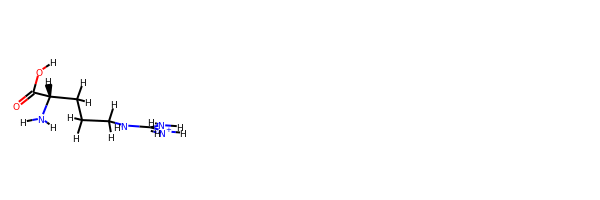

--------
bond
35.42442663159563 kJ/mol 35.46044339262206 kJ/mol False
angle
46.83589771040059 kJ/mol 46.87787438851666 kJ/mol False
nb
13.783253079699886 kJ/mol 13.783253079699886 kJ/mol True
torsion
67.98011953494877 kJ/mol 84.71614809309445 kJ/mol False
164.02369695664487 kJ/mol 180.83771895393306 kJ/mol

DrugBank_3869
     RD


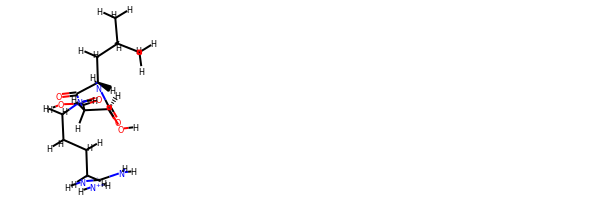

--------
bond
7.952166585936798 kJ/mol 7.952166585936798 kJ/mol True
angle
15.726746347529577 kJ/mol 15.726746347529577 kJ/mol True
nb
13.662877658084783 kJ/mol 13.662877658084783 kJ/mol True
torsion
16.16577762796062 kJ/mol 16.165777627960622 kJ/mol False
53.507568219511775 kJ/mol 53.50756821951178 kJ/mol

DrugBank_4119
     RD


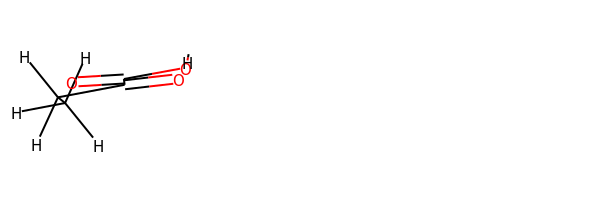

--------
bond
31.47030766970876 kJ/mol 31.47030766970876 kJ/mol True
angle
47.253142969916304 kJ/mol 47.253142969916304 kJ/mol True
nb
63.81831245959343 kJ/mol 63.81831245959343 kJ/mol True
torsion
32.16553640203189 kJ/mol 32.16553640203191 kJ/mol False
174.7072995012504 kJ/mol 174.70729950125042 kJ/mol

DrugBank_4333
     RD


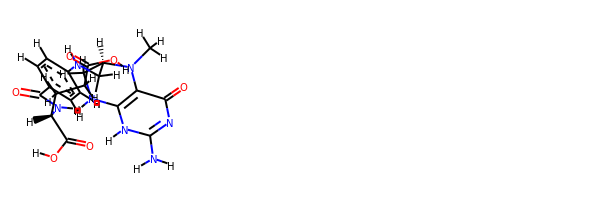

--------
bond
53.586409290356684 kJ/mol 72.95878212260594 kJ/mol False
angle
1.7737799777831598e-06 kJ/mol 1.7737799777831598e-06 kJ/mol True
nb
0.0 kJ/mol 0.0 kJ/mol True
torsion
0.0 kJ/mol 0.0 kJ/mol True
53.58641106413666 kJ/mol 72.95878389638591 kJ/mol

DrugBank_4676
     RD


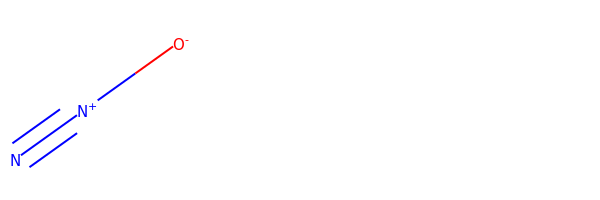

--------
bond
37.582164481642764 kJ/mol 37.60053312899723 kJ/mol False
angle
350.1061393965378 kJ/mol 350.1484080045402 kJ/mol False
nb
28.15547756572215 kJ/mol 28.15547756572215 kJ/mol True
torsion
107.9859388755767 kJ/mol 124.72196828892884 kJ/mol False
523.8297203194795 kJ/mol 540.6263869881884 kJ/mol

DrugBank_4784
     RD


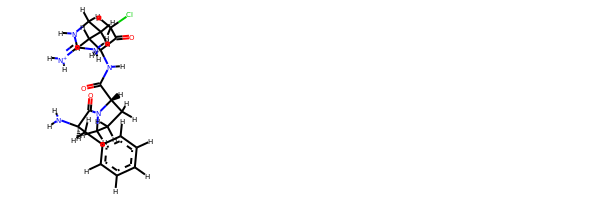

--------
bond
9.223612279672462 kJ/mol 9.223612279672462 kJ/mol True
angle
16.426438886403865 kJ/mol 16.426438886403865 kJ/mol True
nb
25.242020514715904 kJ/mol 25.242020514715904 kJ/mol True
torsion
16.167205796890634 kJ/mol 16.16720579689063 kJ/mol False
67.05927747768287 kJ/mol 67.05927747768285 kJ/mol

DrugBank_5640
     RD


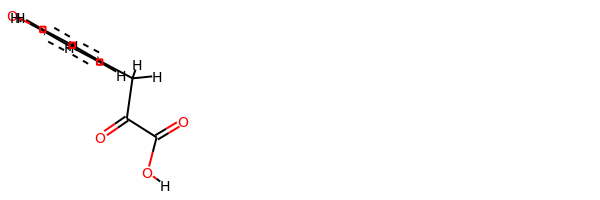

--------


In [7]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print("RDK parsing error")
        return False
#     print(Chem.MolToSmiles(rdkmol))
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol], verbose = False)
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol], verbose = False)

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
#     g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_oe, system_oe, system_oe, positions_oe, positions_oe, verbose = False,skip_assert = True)
    if(e1 == e2): return False
    for i in g1:
        print(i)
        print(g1[i], g2[i], g1[i] == g2[i])

    print( e1, e2)
    print('')
    return True

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
# flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
# istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

fout = open("/home/shuwang/remove_oeimplicityHydrogen", "w")
counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
#     rdkmol = Chem.MolFromMol2Block(mol2, sanitize = True, removeHs = False)
    rdkmol = Chem.MolFromMol2Block(mol2, sanitize = False, removeHs = False)
#     Chem.Kekulize(rdkmol)
    writeToFile = compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    if not writeToFile:        continue
    
    print(Chem.MolToMolBlock(rdkmol)[0:21])
    x = Draw.MolsToGridImage([rdkmol], kekulize = False)
    display(x)
    print("--------")
    fout.write(mol2)
fout.close()


Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       74 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        4 matches
                                               [#6X3:1]:[#6X3:2] :       24 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        4 matches
                                               [#6X3:1]-[#7X3:2] :        1 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       74 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        4 matches
                                               [#6X3:1]:[#6X3:2] :       24 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        4 matches
                                               [#6X3:1]-[#7X3:2] :        1 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

bond
29964.783608035767 kJ/mol 29964.783608035767 kJ/mol True
angle
12.021409253648924 kJ/mol 12.021409253648924 kJ/mol True
nb
46.05461517642205 kJ/mol 43.19435349891394 kJ/mol False
torsion
46.60303346889985 kJ/mol 46.60303346889985 kJ/mol True
30069.462665934734 kJ/mol 30066.602404257228 kJ/mol

DrugBank_364
     RDK


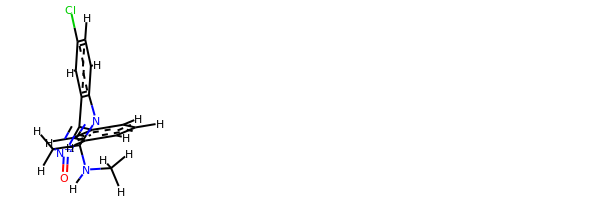

rdkit:  [H]c1c([H])c([H])c(C2=[N+2](=O)C([H])([H])C(N([H])C([H])([H])[H])=Nc3c([H])c([H])c(Cl)c([H])c32)c([H])c1[H]
oechem:  CNC1=Nc2ccc(cc2C(=N(=O)C1)c3ccccc3)Cl
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       28 matches
                                               [#6X4:1]-[#6X4:2] :        2 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        1 matches
                                               [#6X3:1]-[#7X3:2] :        0 m

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       28 matches
                                               [#6X4:1]-[#6X4:2] :        2 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        1 matches
                                               [#6X3:1]-[#7X3:2] :        0 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

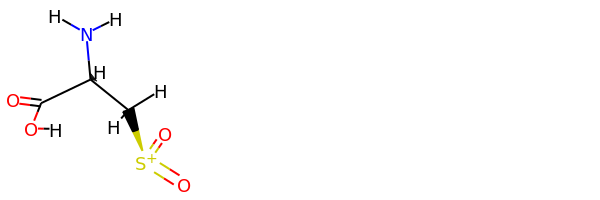

rdkit:  [H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])[S+](=O)=O
oechem:  C([C@@H](C(=O)O)N)[S-](=O)=O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       28 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        4 matches
                                               [#6X3:1]-[#7X3:2] :        3 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       28 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        4 matches
                                               [#6X3:1]-[#7X3:2] :        3 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

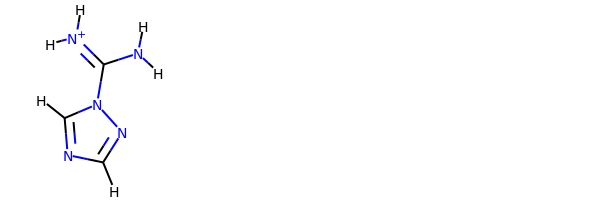

rdkit:  [H]C1=NN(C(N([H])[H])=[N+]([H])[H])C([H])=N1
oechem:  c1ncn(n1)C(=[NH2+])N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       26 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        0 matches
                                               [#6X3:1]-[#7X3:2] :        0 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :       

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       26 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        0 matches
                                               [#6X3:1]-[#7X3:2] :        0 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

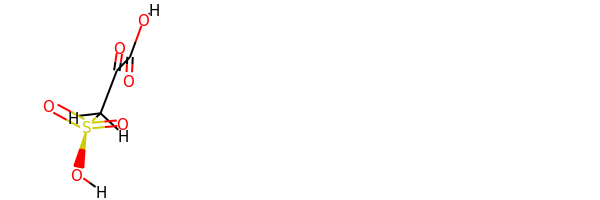

rdkit:  [H]OC(=O)C(=O)C([H])([H])S(=O)(=O)O[H]
oechem:  C(C(=O)C(=O)O)S(=O)(=O)O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       54 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        5 matches
                                               [#6X3:1]-[#7X3:2] :        3 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       54 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        5 matches
                                               [#6X3:1]-[#7X3:2] :        3 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        1 match

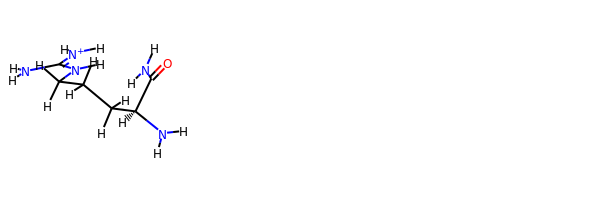

rdkit:  [H]N([H])C(=O)[C@@]([H])(N([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H]
oechem:  C(C[C@@H](C(=O)N)N)CNC(=[NH2+])N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      102 matches
                                               [#6X4:1]-[#6X4:2] :        4 matches
                                               [#6X4:1]-[#6X3:2] :        2 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        2 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :       16 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        8 matches
                                               [#6X3:1]-[#7X3:2] :        7 matches
      

                                      [*:1]~[#15:2]-[#6:3]-[*:4] :        0 matches
                                    [*:1]~[#15:2]-[#6X3:3]~[*:4] :        0 matches
                                       [*:1]-[#8:2]-[#8:3]-[*:4] :        0 matches
                                     [*:1]-[#8:2]-[#8H1:3]-[*:4] :        0 matches
                                     [*:1]~[#8X2:2]-[#7:3]~[*:4] :        0 matches
                             [*:1]-[#8X2r5:2]-;@[#7X3r5:3]~[*:4] :        0 matches
                             [*:1]-[#8X2r5:2]-;@[#7X2r5:3]~[*:4] :        0 matches
                         [*:1]-[#7X4,#7X3:2]-[#7X4,#7X3:3]-[*:4] :        0 matches
                       [#1:1]-[#7X4,#7X3:2]-[#7X4,#7X3:3]-[#1:4] :        0 matches
                     [#6X4:1]-[#7X4,#7X3:2]-[#7X4,#7X3:3]-[#1:4] :        0 matches
                   [#6X4:1]-[#7X4,#7X3:2]-[#7X4,#7X3:3]-[#6X4:4] :        0 matches
              [*:1]-[#7X4,#7X3:2]-[#7X3$(*~[#6X3,#6X2]):3]~[*:4] :        0 


HarmonicAngleGenerator:

                                               [*:1]~[*:2]~[*:3] :      160 matches
                                            [*:1]~[#6X4:2]-[*:3] :       36 matches
                                          [#1:1]-[#6X4:2]-[#1:3] :        4 matches
                                [*;r3:1]1~;@[*;r3:2]~;@[*;r3:3]1 :        0 matches
                                    [*;r3:1]~;@[*;r3:2]~;!@[*:3] :        0 matches
                                      [*:1]~;!@[*;r3:2]~;!@[*:3] :        0 matches
                                        [#1:1]-[*;r3:2]~;!@[*:3] :        0 matches
                                            [*:1]~[#6X3:2]~[*:3] :       84 matches
                                           [#1:1]-[#6X3:2]~[*:3] :        8 matches
                                          [#1:1]-[#6X3:2]-[#1:3] :        0 matches
                               [*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3] :        0 matches
                                    [*:1]~;!@[*;r5

81.08324528905254 kJ/mol 81.08324528905254 kJ/mol True
torsion
8.066930905144714 kJ/mol 8.066930905144716 kJ/mol False
211.55192903391742 kJ/mol 211.55192903391745 kJ/mol

DrugBank_2087
     RD


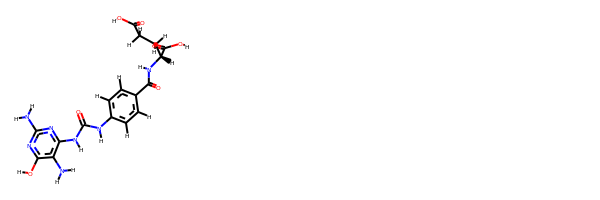

rdkit:  [H]OC(=O)C([H])([H])C([H])([H])[C@]([H])(C(=O)O[H])N([H])C(=O)c1c([H])c([H])c(N([H])C(=O)N([H])c2nc(N([H])[H])nc(O[H])c2N([H])[H])c([H])c1[H]
oechem:  c1cc(ccc1C(=O)N[C@H](CCC(=O)O)C(=O)O)NC(=O)Nc2c(c(nc(n2)N)O)N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       74 matches
                                               [#6X4:1]-[#6X4:2] :       10 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        1 matches
                   

                    [#1:1]-[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]-[*:3] :        0 matches
                                            [*:1]~[#7X2:2]~[*:3] :        0 matches
                                          [*:1]~[#7X2+0:2]~[*:3] :        0 matches
                                         [#1:1]-[#7X2+0:2]~[*:3] :        0 matches
                         [#6,#7,#8:1]-[#7X3:2](~[#8X1])~[#8X1:3] :        2 matches
                                      [#8X1:1]~[#7X3:2]~[#8X1:3] :        2 matches
                                         [*:1]~[#7X2:2]~[#7X1:3] :        0 matches
                                              [*:1]-[#8:2]-[*:3] :       12 matches
                            [#6X3,#7:1]~;@[#8;r:2]~;@[#6X3,#7:3] :        0 matches
                                          [*:1]-[#8X2+1:2]=[*:3] :        0 matches
                                           [*:1]~[#16X4:2]~[*:3] :        0 matches
                                   [*:1]-[#16X4,#16X3+0:2]-[*:3] :        0 

                             [#6X4:1]-[#8X2:2]-[#6X4:3]-[#7X3:4] :        0 matches
                      [#6X3:1]-[#8X2:2]-[#6X4;r3:3]-@[#6X4;r3:4] :        0 matches
                            [#6X3:1]-[#8X2:2]-[#6X4;r3:3]-[#1:4] :        0 matches
                              [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#1:4] :        0 matches
                            [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#6X4:4] :        0 matches
                         [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                                   [*:1]~[#6X3:2]-[#8X2:3]-[*:4] :        2 matches
                                  [*:1]~[#6X3:2]-[#8X2:3]-[#1:4] :        0 matches
                   [*:1]~[#6X3:2](=[#8,#16,#7])-[#8X2H0:3]-[*:4] :        0 matches
                      [*:1]~[#6X3:2](=[#8,#16,#7])-[#8:3]-[#1:4] :        0 matches
                               [#1:1]-[#8X2:2]-[#6X3:3]=[#8X1:4] :        0 matches
                      [#8,#16,#7:1]=[#6X3:2]-[#8X2H0:3]-[#6X4:4] :        0 

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       74 matches
                                               [#6X4:1]-[#6X4:2] :       10 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        1 matches
                                               [#6X3:1]-[#7X3:2] :        1 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

                                          [#1:1]-[#6X3:2]-[#1:3] :        0 matches
                               [*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3] :        0 matches
                                    [*:1]~;!@[*;r5:2]~;@[*;r5:3] :        0 matches
                                        [#8X1:1]~[#6X3:2]~[#8:3] :        0 matches
                                            [*:1]~[#6X2:2]~[*:3] :        0 matches
                                [*:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :        0 matches
                               [#1:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :        0 matches
                     [*:1]~[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]~[*:3] :        6 matches
                    [#1:1]-[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]-[*:3] :        0 matches
                                            [*:1]~[#7X2:2]~[*:3] :        0 matches
                                          [*:1]~[#7X2+0:2]~[*:3] :        0 matches
                                         [#1:1]-[#7X2+0:2]~[*:3] :        0 

                                                          [#7:1] :        1 matches
                                                         [#16:1] :        0 matches
                                                         [#15:1] :        0 matches
                                                          [#9:1] :        0 matches
                                                         [#17:1] :        0 matches
                                                         [#35:1] :        0 matches
                                                         [#53:1] :        0 matches

bond
29.942412908103822 kJ/mol 29.942412908103822 kJ/mol True
angle
16.52086976701568 kJ/mol 16.52086976701568 kJ/mol True
nb
35.94940128639869 kJ/mol 35.94940128639869 kJ/mol True
torsion
77.5284429056739 kJ/mol 77.52844253486008 kJ/mol False
159.94112686719208 kJ/mol 159.94112649637827 kJ/mol

DrugBank_2344
     RD


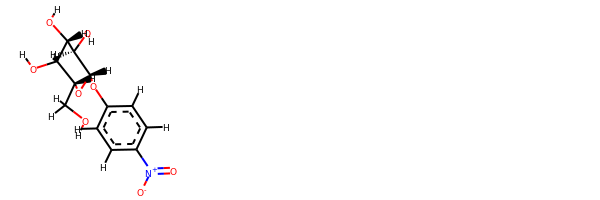

rdkit:  [H]OC([H])([H])[C@@]1([H])O[C@@]([H])(Oc2c([H])c([H])c([N+](=O)[O-])c([H])c2[H])[C@]([H])(O[H])[C@@]([H])(O[H])[C@@]1([H])O[H]
oechem:  c1cc(ccc1N(=O)=O)O[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)O)O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       52 matches
                                               [#6X4:1]-[#6X4:2] :        4 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        1 matches
                                   

                                        [#1:1]-[*;r3:2]~;!@[*:3] :        0 matches
                                            [*:1]~[#6X3:2]~[*:3] :        6 matches
                                           [#1:1]-[#6X3:2]~[*:3] :        0 matches
                                          [#1:1]-[#6X3:2]-[#1:3] :        0 matches
                               [*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3] :        0 matches
                                    [*:1]~;!@[*;r5:2]~;@[*;r5:3] :        0 matches
                                        [#8X1:1]~[#6X3:2]~[#8:3] :        1 matches
                                            [*:1]~[#6X2:2]~[*:3] :        0 matches
                                [*:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :       12 matches
                               [#1:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :        8 matches
                     [*:1]~[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]~[*:3] :        0 matches
                    [#1:1]-[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]-[*:3] :        0 

                    [#6X4:1]-[#16X4,#16X3+0:2]-[#7X2:3]~[#6X3:4] :        0 matches
                    [#8X1:1]~[#16X4,#16X3+0:2]-[#7X2:3]~[#6X3:4] :        0 matches
                          [*:1]~[#16X4,#16X3+0:2]-[#8X2:3]-[*:4] :        6 matches
                 [*:1]-[#16X2,#16X3+1:2]-[#16X2,#16X3+1:3]-[*:4] :        0 matches
                                    [*:1]-[#8X2:2]-[#15:3]~[*:4] :        0 matches
                              [#8X2:1]-[#15:2]-[#8X2:3]-[#6X4:4] :        0 matches
                                    [*:1]~[#7X3:2]-[#15:3]~[*:4] :        0 matches
                                    [*:1]~[#7X4:2]-[#15:3]~[*:4] :        0 matches
                                      [*:1]-[#7:2]-[#15:3]=[*:4] :        0 matches
                                   [#6X3:1]-[#7:2]-[#15:3]=[*:4] :        0 matches
                                         [*:1]-[*:2]#[*:3]-[*:4] :        0 matches
                                         [*:1]~[*:2]-[*:3]#[*:4] :        0 

                                         [*:1]~[*:2]~[*:3]~[*:4] :      118 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       36 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       12 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 

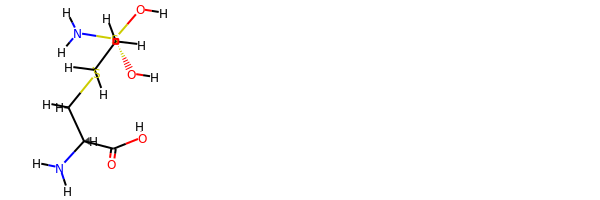

rdkit:  [H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])SC([H])([H])C([H])([H])S(O[H])(O[H])N([H])[H]
oechem:  C(C[S+2](N)(O)O)SC[C@@H](C(=O)O)N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      142 matches
                                               [#6X4:1]-[#6X4:2] :       12 matches
                                               [#6X4:1]-[#6X3:2] :        4 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        3 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :       24 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        9 matches
                                               [#6X3:1]-[#7X3:2] :        5 matches
                  

                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                                [#1:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                                [*:1]-[#6X4:2]-[#6X4;r3:3]-[*:4] :        0 matches
                          [*:1]-[#6X4:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                            [*:1]-[#6X4;r3:2]-@[#6X4;r3:3]-[*:4] :        0 matches
                       [#6X4;r3:1]-[#6X4;r3:2]-[#6X4;r3:3]-[*:4] :        0 matches
                                   [*:1]~[#6X3:2]-[#6X4:3]-[*:4] :       24 matches
                               [#1:1]-[#6X4:2]-[#6X3:3]=[#8X1:4] :        3 

                                                         [#35:1] :        0 matches
                                                         [#53:1] :        0 matches

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      142 matches
                                               [#6X4:1]-[#6X4:2] :       12 matches
                                               [#6X4:1]-[#6X3:2] :        4 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        3 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :       24 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        9 matches
                                               [#6X3:1]-[#7X3:2] :        5 matc

                                            [*:1]~[#6X3:2]~[*:3] :       96 matches
                                           [#1:1]-[#6X3:2]~[*:3] :       20 matches
                                          [#1:1]-[#6X3:2]-[#1:3] :        0 matches
                               [*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3] :        0 matches
                                    [*:1]~;!@[*;r5:2]~;@[*;r5:3] :        0 matches
                                        [#8X1:1]~[#6X3:2]~[#8:3] :        1 matches
                                            [*:1]~[#6X2:2]~[*:3] :        0 matches
                                [*:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :       32 matches
                               [#1:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :       14 matches
                     [*:1]~[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]~[*:3] :       30 matches
                    [#1:1]-[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]-[*:3] :       12 matches
                                            [*:1]~[#7X2:2]~[*:3] :        0 

                                                   [#1:1]-[#6X2] :        0 matches
                                                     [#1:1]-[#7] :        8 matches
                                                     [#1:1]-[#8] :        1 matches
                                                    [#1:1]-[#16] :        0 matches
                                                          [#6:1] :       25 matches
                                                        [#6X2:1] :        0 matches
                                                        [#6X4:1] :        9 matches
                                                          [#8:1] :        4 matches
                                                    [#8X2H0+0:1] :        0 matches
                                                    [#8X2H1+0:1] :        1 matches
                                                          [#7:1] :        6 matches
                                                         [#16:1] :        0 

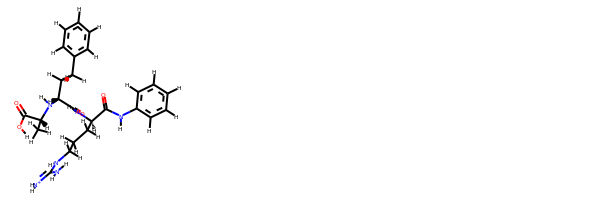

rdkit:  [H]OC(=O)[C@]([H])(N([H])[C@@]([H])(C(=O)N([H])[C@@]([H])(C(=O)N([H])c1c([H])c([H])c([H])c([H])c1[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])C([H])([H])C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])C([H])([H])[H]
oechem:  C[C@H](C(=O)O)N[C@H](CCc1ccccc1)C(=O)N[C@H](CCCNC(=[NH2+])N)C(=O)Nc2ccccc2
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      122 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        8 matches
                                               [#6X3:1]:[#6X3:2] :       24 matches
                                               [#6X3:1]=[#6X3:2] :        2 match


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      286 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       54 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :       18 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      122 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        8 matches
                                               [#6X3:1]:[#6X3:2] :       24 matches
                                               [#6X3:1]=[#6X3:2] :        2 matches
                                                   [#6:1]-[#7:2] :        2 matches
                                               [#6X3:1]-[#7X3:2] :        1 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

                     [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3:3]~[#6X3:4] :        0 matches
               [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3;r6:3]:[#6X3;r6:4] :        0 matches
             [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3;r5:3]-;@[#6X3;r5:4] :        0 matches
             [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3;r5:3]=;@[#6X3;r5:4] :        0 matches
                     [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3:3]-[#6X4:4] :        0 matches
               [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3;r6:3]:[#7X2;r6:4] :        0 matches
                     [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3:3]=[#7X2:4] :        0 matches
                     [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3:3]-[#8X2:4] :        0 matches
                     [#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3:3]=[#8X1:4] :        0 matches
                                   [*:1]~[#6X3:2]-[#6X3:3]~[*:4] :       32 matches
                                   [*:1]~[#6X3:2]:[#6X3:3]~[*:4] :       96 matches
                               [*:1]-,:[#6X3:2]=[#6X3:3]-,:[*:4] :        8 

                 [*:1]-[#16X2,#16X3+1:2]-[#16X2,#16X3+1:3]-[*:4] :        0 matches
                                    [*:1]-[#8X2:2]-[#15:3]~[*:4] :        0 matches
                              [#8X2:1]-[#15:2]-[#8X2:3]-[#6X4:4] :        0 matches
                                    [*:1]~[#7X3:2]-[#15:3]~[*:4] :        0 matches
                                    [*:1]~[#7X4:2]-[#15:3]~[*:4] :        0 matches
                                      [*:1]-[#7:2]-[#15:3]=[*:4] :        0 matches
                                   [#6X3:1]-[#7:2]-[#15:3]=[*:4] :        0 matches
                                         [*:1]-[*:2]#[*:3]-[*:4] :        0 matches
                                         [*:1]~[*:2]-[*:3]#[*:4] :        0 matches
                          [*:1]~[*:2]=[#6,#7,#16,#15;X2:3]=[*:4] :        0 matches

PeriodicTorsionGenerator Impropers:

                                    [*:1]~[#6X3:2](~[*:3])~[*:4] :       96 matches
                                [*:1]~

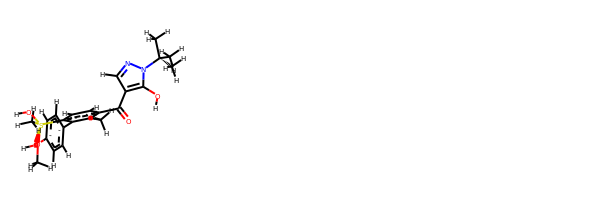

rdkit:  [H]OC1=C(C(=O)c2c([H])c([H])c(S(O[H])(O[H])C([H])([H])[H])c(-c3c([H])c([H])c(OC([H])([H])[H])c([H])c3[H])c2C([H])([H])[H])C([H])=NN1C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]
oechem:  Cc1c(ccc(c1c2ccc(cc2)OC)[S+2](C)(O)O)C(=O)c3cnn(c3O)C(C)(C)C
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       82 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :       14 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :       12 matches
                                                   [#6:1]-[#7:2] :

                                          [#1:1]-[#6X3:2]-[#1:3] :        0 matches
                               [*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3] :        2 matches
                                    [*:1]~;!@[*;r5:2]~;@[*;r5:3] :        6 matches
                                        [#8X1:1]~[#6X3:2]~[#8:3] :        1 matches
                                            [*:1]~[#6X2:2]~[*:3] :        0 matches
                                [*:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :       18 matches
                               [#1:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :        6 matches
                     [*:1]~[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]~[*:3] :       18 matches
                    [#1:1]-[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]-[*:3] :        6 matches
                                            [*:1]~[#7X2:2]~[*:3] :        0 matches
                                          [*:1]~[#7X2+0:2]~[*:3] :        0 matches
                                         [#1:1]-[#7X2+0:2]~[*:3] :        0 

                                  [*:1]~[#6X3:2]-[#8X2:3]-[#1:4] :        2 matches
                   [*:1]~[#6X3:2](=[#8,#16,#7])-[#8X2H0:3]-[*:4] :        0 matches
                      [*:1]~[#6X3:2](=[#8,#16,#7])-[#8:3]-[#1:4] :        1 matches
                               [#1:1]-[#8X2:2]-[#6X3:3]=[#8X1:4] :        1 matches
                      [#8,#16,#7:1]=[#6X3:2]-[#8X2H0:3]-[#6X4:4] :        0 matches
                               [#1:1]-[#8X2H1:2]-@[#6X3:3]~[*:4] :        0 matches
                                 [*:1]-[#8X2+1:2]=[#6X3:3]-[*:4] :        0 matches
                                   [*:1]=[#8X2+1:2]-[#6:3]~[*:4] :        0 matches
                                    [*:1]~[#16:2]=,:[#6:3]~[*:4] :        0 matches
                            [*:1]-[#16X2,#16X3+1:2]-[#6:3]~[*:4] :        0 matches
                           [*:1]-[#16X2,#16X3+1:2]-[#6:3]-[#1:4] :        0 matches
[#6X3:1]-@[#16X2,#16X1-1,#16X3+1:2]-@[#6X3,#7X2;r5:3]=@[#6,#7;r5:4] :       

                                                  [#7:1]-[#17:2] :        0 matches
                                                  [#7:1]-[#35:2] :        0 matches
                                                  [#7:1]-[#53:2] :        0 matches
                                                  [#15:1]-[#9:2] :        0 matches
                                                 [#15:1]-[#17:2] :        0 matches
                                                 [#15:1]-[#35:2] :        0 matches
                                                 [#15:1]-[#53:2] :        0 matches
                                                 [#6X4:1]-[#1:2] :        2 matches
                                                 [#6X3:1]-[#1:2] :        8 matches
                                                 [#6X2:1]-[#1:2] :        0 matches
                                                   [#7:1]-[#1:2] :        3 matches
                                                   [#8:1]-[#1:2] :        1 

                                                          [#1:1] :       14 matches
                                                   [#1:1]-[#6X4] :        2 matches
                            [#1:1]-[#6X4]-[#7,#8,#9,#16,#17,#35] :        2 matches
   [#1:1]-[#6X4](-[#7,#8,#9,#16,#17,#35])-[#7,#8,#9,#16,#17,#35] :        0 matches
[#1:1]-[#6X4](-[#7,#8,#9,#16,#17,#35])(-[#7,#8,#9,#16,#17,#35])-[#7,#8,#9,#16,#17,#35] :        0 matches
                                         [#1:1]-[#6X4]~[*+1,*+2] :        0 matches
                                                   [#1:1]-[#6X3] :        8 matches
                            [#1:1]-[#6X3]~[#7,#8,#9,#16,#17,#35] :        2 matches
   [#1:1]-[#6X3](~[#7,#8,#9,#16,#17,#35])~[#7,#8,#9,#16,#17,#35] :        0 matches
                                                   [#1:1]-[#6X2] :        0 matches
                                                     [#1:1]-[#7] :        3 matches
                                                     [

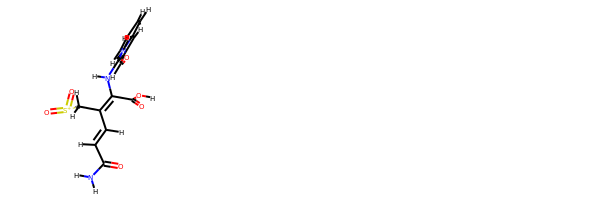

rdkit:  [H]OC(=O)C(=C(C([H])=C([H])C(=O)N([H])[H])C([H])([H])[S+](=O)=O)N([H])C1=C(C([H])=O)C([H])=C2C([H])=C([H])C([H])=C([H])N21
oechem:  c1ccn2c(c1)cc(c2N/C(=C(\C[S-](=O)=O)/C=C/C(=O)N)/C(=O)O)C=O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       56 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        3 matches
                                        

                                  [*:1]-[#6X4:2]-[#8X2:3]-[#1:4] :        0 matches
                             [#6X4:1]-[#6X4:2]-[#8X2H1:3]-[#1:4] :        0 matches
                                 [*:1]-[#6X4:2]-[#8X2H0:3]-[*:4] :        9 matches
                           [#6X4:1]-[#6X4:2]-[#8X2H0:3]-[#6X4:4] :        0 matches
                             [#6X4:1]-[#6X4:2]-[#8X2:3]-[#6X3:4] :        0 matches
                             [#6X4:1]-[#8X2:2]-[#6X4:3]-[#8X2:4] :        0 matches
                             [#6X4:1]-[#8X2:2]-[#6X4:3]-[#7X3:4] :        0 matches
                      [#6X3:1]-[#8X2:2]-[#6X4;r3:3]-@[#6X4;r3:4] :        0 matches
                            [#6X3:1]-[#8X2:2]-[#6X4;r3:3]-[#1:4] :        0 matches
                              [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#1:4] :        0 matches
                            [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#6X4:4] :        0 matches
                         [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 

                                                          [#7:1] :        3 matches
                                                         [#16:1] :        0 matches
                                                         [#15:1] :        0 matches
                                                          [#9:1] :        0 matches
                                                         [#17:1] :        0 matches
                                                         [#35:1] :        0 matches
                                                         [#53:1] :        0 matches

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       56 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matc


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      120 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       54 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       24 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        4 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        2 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        6 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

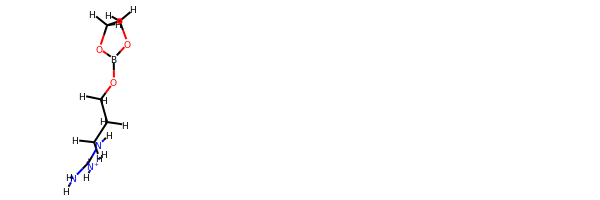

rdkit:  [H]N([H])C(N([H])C([H])([H])C([H])([H])C([H])([H])OB1OC([H])([H])C([H])([H])O1)=[N+]([H])[H]
oechem:  B1(OCCO1)OCCCNC(=[NH2+])N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       66 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        4 matches
                                                   [#6:1]-[#7:2] :        5 matches
                                               [#6X3:1]-[#7X3:2] :        2 matches
                    


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      156 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       54 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :       12 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

NonbondedForceGenerator:

                                                           [*:1] :       33 matches
                                                          [#1:1] :       13 matches
                                                   [#1:1]-[#6X4] :        6 matches
                            [#1:1]-[#6X4]-[#7,#8,#9,#16,#17,#35] :        3 matches
   [#1:1]-[#6X4](-[#7,#8,#9,#16,#17,#35])-[#7,#8,#9,#16,#17,#35] :        0 matches
[#1:1]-[#6X4](-[#7,#8,#9,#16,#17,#35])(-[#7,#8,#9,#16,#17,#35])-[#7,#8,#9,#16,#17,#35] :        0 matches
                                         [#1:1]-[#6X4]~[*+1,*+2] :        0 matches
                                                   [#1:1]-[#6X3] :        5 matches
                            [#1:1]-[#6X3]~[#7,#8,#9,#16,#17,#35] :        4 matches
   [#1:1]-[#6X3](~[#7,#8,#9,#16,#17,#35])~[#7,#8,#9,#16,#17,#35] :        0 matches
                                                   [#1:1]-[#6X2] :        0 matches
                            

33 bonds added (0 skipped due to constraints)

HarmonicAngleGenerator:

                                               [*:1]~[*:2]~[*:3] :      108 matches
                                            [*:1]~[#6X4:2]-[*:3] :       48 matches
                                          [#1:1]-[#6X4:2]-[#1:3] :        8 matches
                                [*;r3:1]1~;@[*;r3:2]~;@[*;r3:3]1 :        0 matches
                                    [*;r3:1]~;@[*;r3:2]~;!@[*:3] :        0 matches
                                      [*:1]~;!@[*;r3:2]~;!@[*:3] :        0 matches
                                        [#1:1]-[*;r3:2]~;!@[*:3] :        0 matches
                                            [*:1]~[#6X3:2]~[*:3] :       36 matches
                                           [#1:1]-[#6X3:2]~[*:3] :       10 matches
                                          [#1:1]-[#6X3:2]-[#1:3] :        0 matches
                               [*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3] :        0 matches
    

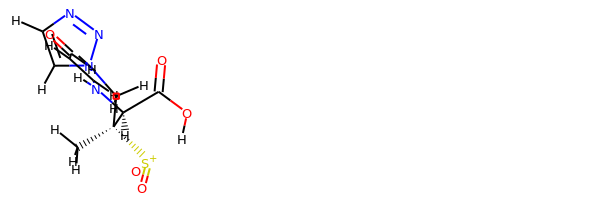

rdkit:  [H]OC(=O)[C@]([H])(N([H])C([H])=C([H])C([H])=O)[C@]([S+](=O)=O)(C([H])([H])[H])C([H])([H])N1N=NC([H])=C1[H]
oechem:  C[C@](Cn1ccnn1)([C@H](C(=O)O)N/C=C/C=O)[S-](=O)=O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       38 matches
                                               [#6X4:1]-[#6X4:2] :        4 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        3 matches
                                               [#6X3:1]-[#7X3:2] 


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :       78 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       36 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       16 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        4 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        2 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       38 matches
                                               [#6X4:1]-[#6X4:2] :        4 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        3 matches
                                               [#6X3:1]-[#7X3:2] :        2 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

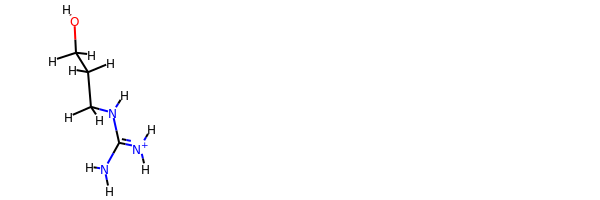

rdkit:  [H]OC([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H]
oechem:  C(CNC(=[NH2+])N)CO
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       66 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        4 matches
                                                   [#6:1]-[#7:2] :        5 matches
                                               [#6X3:1]-[#7X3:2] :        2 matches
                               [#6X4:1]-[#7X3:2]-[#


NonbondedForceGenerator:

                                                           [*:1] :       33 matches
                                                          [#1:1] :       13 matches
                                                   [#1:1]-[#6X4] :        6 matches
                            [#1:1]-[#6X4]-[#7,#8,#9,#16,#17,#35] :        3 matches
   [#1:1]-[#6X4](-[#7,#8,#9,#16,#17,#35])-[#7,#8,#9,#16,#17,#35] :        0 matches
[#1:1]-[#6X4](-[#7,#8,#9,#16,#17,#35])(-[#7,#8,#9,#16,#17,#35])-[#7,#8,#9,#16,#17,#35] :        0 matches
                                         [#1:1]-[#6X4]~[*+1,*+2] :        0 matches
                                                   [#1:1]-[#6X3] :        5 matches
                            [#1:1]-[#6X3]~[#7,#8,#9,#16,#17,#35] :        4 matches
   [#1:1]-[#6X3](~[#7,#8,#9,#16,#17,#35])~[#7,#8,#9,#16,#17,#35] :        0 matches
                                                   [#1:1]-[#6X2] :        0 matches
                           


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      156 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       54 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :       12 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

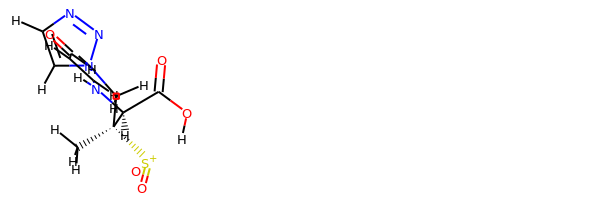

rdkit:  [H]OC(=O)[C@]([H])(N([H])C([H])=C([H])C([H])=O)[C@]([S+](=O)=O)(C([H])([H])[H])C([H])([H])N1N=NC([H])=C1[H]
oechem:  C[C@](Cn1ccnn1)([C@H](C(=O)O)N/C=C/C=O)[S-](=O)=O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       66 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        2 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        2 matches
                                                   [#6:1]-[#7:2] :        5 matches
                                               [#6X3:1]-[#7X3:2] 


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      150 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       54 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        2 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       20 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        7 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

                                                   [#1:1]-[#6X2] :        0 matches
                                                     [#1:1]-[#7] :        6 matches
                                                     [#1:1]-[#8] :        1 matches
                                                    [#1:1]-[#16] :        0 matches
                                                          [#6:1] :        9 matches
                                                        [#6X2:1] :        0 matches
                                                        [#6X4:1] :        5 matches
                                                          [#8:1] :        2 matches
                                                    [#8X2H0+0:1] :        0 matches
                                                    [#8X2H1+0:1] :        1 matches
                                                          [#7:1] :        4 matches
                                                         [#16:1] :        0 


HarmonicAngleGenerator:

                                               [*:1]~[*:2]~[*:3] :      110 matches
                                            [*:1]~[#6X4:2]-[*:3] :       60 matches
                                          [#1:1]-[#6X4:2]-[#1:3] :        8 matches
                                [*;r3:1]1~;@[*;r3:2]~;@[*;r3:3]1 :        0 matches
                                    [*;r3:1]~;@[*;r3:2]~;!@[*:3] :        0 matches
                                      [*:1]~;!@[*;r3:2]~;!@[*:3] :        0 matches
                                        [#1:1]-[*;r3:2]~;!@[*:3] :        0 matches
                                            [*:1]~[#6X3:2]~[*:3] :       24 matches
                                           [#1:1]-[#6X3:2]~[*:3] :        6 matches
                                          [#1:1]-[#6X3:2]-[#1:3] :        2 matches
                               [*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3] :        0 matches
                                    [*:1]~;!@[*;r5

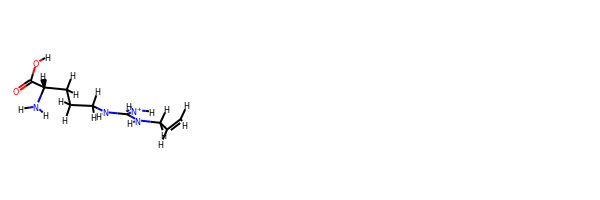

rdkit:  [H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])C([H])([H])C([H])=C([H])[H])=[N+]([H])[H]
oechem:  C=CC/[NH+]=C(\N)/NCCC[C@@H](C(=O)O)N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       52 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        4 matches
                                               [#6X3:1]-[#7X3:2] : 


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      118 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       54 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        2 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       20 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        7 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       52 matches
                                               [#6X4:1]-[#6X4:2] :        6 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        4 matches
                                               [#6X3:1]-[#7X3:2] :        2 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

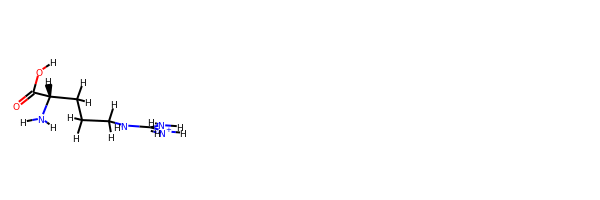

rdkit:  [H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H]
oechem:  C(C[C@@H](C(=O)O)N)CNC(=[NH2+])N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      108 matches
                                               [#6X4:1]-[#6X4:2] :       16 matches
                                               [#6X4:1]-[#6X3:2] :        3 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        3 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        7 matches
                                               [#6X3:1]-[#7X3:2] :        4 matches
           

                                 [*:1]-[#6X4:2]-[#8X2H0:3]-[*:4] :        0 matches
                           [#6X4:1]-[#6X4:2]-[#8X2H0:3]-[#6X4:4] :        0 matches
                             [#6X4:1]-[#6X4:2]-[#8X2:3]-[#6X3:4] :        0 matches
                             [#6X4:1]-[#8X2:2]-[#6X4:3]-[#8X2:4] :        0 matches
                             [#6X4:1]-[#8X2:2]-[#6X4:3]-[#7X3:4] :        0 matches
                      [#6X3:1]-[#8X2:2]-[#6X4;r3:3]-@[#6X4;r3:4] :        0 matches
                            [#6X3:1]-[#8X2:2]-[#6X4;r3:3]-[#1:4] :        0 matches
                              [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#1:4] :        0 matches
                            [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#6X4:4] :        0 matches
                         [#1:1]-[#8X2:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                                   [*:1]~[#6X3:2]-[#8X2:3]-[*:4] :        2 matches
                                  [*:1]~[#6X3:2]-[#8X2:3]-[#1:4] :        2 

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      108 matches
                                               [#6X4:1]-[#6X4:2] :       16 matches
                                               [#6X4:1]-[#6X3:2] :        3 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        3 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        7 matches
                                               [#6X3:1]-[#7X3:2] :        4 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        2 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        2 match

                   [*:1]-[#6X4:2]-[#7X3$(*~[#6X3,#6X2]):3]~[*:4] :       18 matches
                     [*:1]-[#6X4:2]-[#7X3$(*~[#8X1]):3]~[#8X1:4] :        0 matches
                             [#6X3:1]-[#7X3:2]-[#6X4:3]-[#6X3:4] :        1 matches
                 [#6X4:1]-[#6X4:2]-[#7X3:3]-[#6X3:4]=[#8,#16,#7] :        3 matches
                           [#8X2H0:1]-[#6X4:2]-[#7X3:3]-[#6X3:4] :        0 matches
                       [#6X3:1]-[#7X3:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                                   [*:1]~[#7X2:2]-[#6X4:3]-[*:4] :        0 matches
                        [#6X3:1]=[#7X2,#7X3+1:2]-[#6X4:3]-[#1:4] :        0 matches
                 [#6X3:1]=[#7X2,#7X3+1:2]-[#6X4:3]-[#6X3,#6X4:4] :        0 matches
                            [*:1]~[#7X3,#7X2-1:2]-[#6X3:3]~[*:4] :       16 matches
                          [*:1]~[#7X3,#7X2-1:2]-!@[#6X3:3]~[*:4] :       16 matches
                          [#1:1]-[#7X3:2]-[#6X3:3]=[#8,#16,#7:4] :        5 

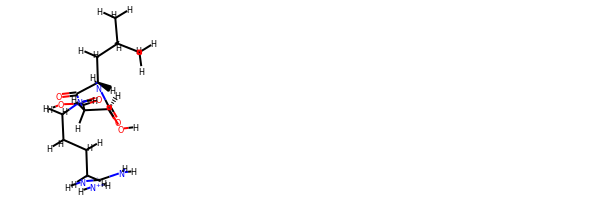

rdkit:  [H]OC(=O)C([H])([H])[C@]([H])(O[H])C(=O)N([H])[C@]([H])(C(=O)N([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])C([H])([H])C([H])(C([H])([H])[H])C([H])([H])[H]
oechem:  CC(C)C[C@@H](C(=O)NCCCCNC(=[NH2+])N)NC(=O)[C@H](CC(=O)O)O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       24 matches
                                               [#6X4:1]-[#6X4:2] :        2 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-

                               [*:1]-,:[#6X3:2]=[#6X3:3]-,:[*:4] :        0 matches
                             [#6X4:1]-[#6X3:2]=[#6X3:3]-[#6X4:4] :        0 matches
                   [*:1]~[#6X3:2]-[#6X3$(*=[#8,#16,#7]):3]~[*:4] :        8 matches
                             [#6X3:1]=[#6X3:2]-[#6X3:3]=[#8X1:4] :        0 matches
                                     [*:1]~[#7a:2]:[#6a:3]~[*:4] :        0 matches
                                   [*:1]-[#6X4:2]-[#7X4:3]-[*:4] :        0 matches
                                   [*:1]-[#6X4:2]-[#7X3:3]-[*:4] :        0 matches
                        [#6X4:1]-[#6X4:2]-[#7X4,#7X3:3]-[#6X4:4] :        0 matches
                           [*:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[*:4] :        0 matches
                          [#1:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[*:4] :        0 matches
                    [#1:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                          [!1:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[*:4] :        0 

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       24 matches
                                               [#6X4:1]-[#6X4:2] :        2 matches
                                               [#6X4:1]-[#6X3:2] :        1 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        0 matches
                                               [#6X3:1]-[#7X3:2] :        0 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                                [#1:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                                [*:1]-[#6X4:2]-[#6X4;r3:3]-[*:4] :        0 matches
                          [*:1]-[#6X4:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                            [*:1]-[#6X4;r3:2]-@[#6X4;r3:3]-[*:4] :        0 matches
                       [#6X4;r3:1]-[#6X4;r3:2]-[#6X4;r3:3]-[*:4] :        0 matches
                                   [*:1]~[#6X3:2]-[#6X4:3]-[*:4] :        6 

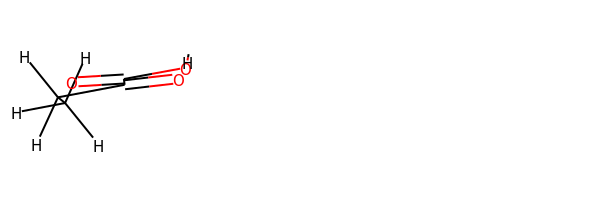

rdkit:  [H]OC(=O)C(=O)C([H])([H])C([H])([H])[H]
oechem:  CCC(=O)C(=O)O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      120 matches
                                               [#6X4:1]-[#6X4:2] :        8 matches
                                               [#6X4:1]-[#6X3:2] :        2 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        2 matches
                                               [#6X3:1]-[#6X3:2] :        4 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        2 matches
                                                   [#6:1]-[#7:2] :       13 matches
                                               [#6X3:1]-[#7X3:2] :        7 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        1 matches
 


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      300 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       72 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       20 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        7 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      120 matches
                                               [#6X4:1]-[#6X4:2] :        8 matches
                                               [#6X4:1]-[#6X3:2] :        2 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        2 matches
                                               [#6X3:1]-[#6X3:2] :        4 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        2 matches
                                                   [#6:1]-[#7:2] :       13 matches
                                               [#6X3:1]-[#7X3:2] :        7 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        1 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        1 match


                                         [*:1]~[*:2]~[*:3]~[*:4] :      300 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :       72 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       20 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        7 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0

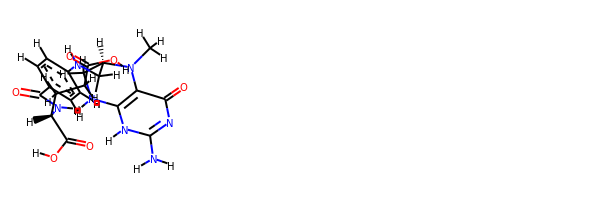

rdkit:  [H]OC(=O)C([H])([H])C([H])([H])[C@@]([H])(C(=O)O[H])N([H])C(=O)c1c([H])c([H])c(N([H])C([H])([H])[C@]2([H])N(C([H])([H])[H])C3=C(N([H])C(N([H])[H])=NC3=O)N([H])C2([H])[H])c([H])c1[H]
oechem:  CN1c2c([nH]c(nc2=O)N)NC[C@@H]1CNc3ccc(cc3)C(=O)N[C@@H](CCC(=O)O)C(=O)O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :        4 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :        0 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :        0 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :        4 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        0 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        0 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :        0 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        0 matches
                                               [#6X3:1]-[#7X3:2] :        0 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

                          [#1:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[*:4] :        0 matches
                    [#1:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                          [!1:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[*:4] :        0 matches
                   [!#1:1]-[#7X4,#7X3:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                                   [*:1]-[#7X4:2]-[#6X3:3]~[*:4] :        0 matches
                   [*:1]-[#6X4:2]-[#7X3$(*~[#6X3,#6X2]):3]~[*:4] :        0 matches
                     [*:1]-[#6X4:2]-[#7X3$(*~[#8X1]):3]~[#8X1:4] :        0 matches
                             [#6X3:1]-[#7X3:2]-[#6X4:3]-[#6X3:4] :        0 matches
                 [#6X4:1]-[#6X4:2]-[#7X3:3]-[#6X3:4]=[#8,#16,#7] :        0 matches
                           [#8X2H0:1]-[#6X4:2]-[#7X3:3]-[#6X3:4] :        0 matches
                       [#6X3:1]-[#7X3:2]-[#6X4;r3:3]-[#6X4;r3:4] :        0 matches
                                   [*:1]~[#7X2:2]-[#6X4:3]-[*:4] :        0 

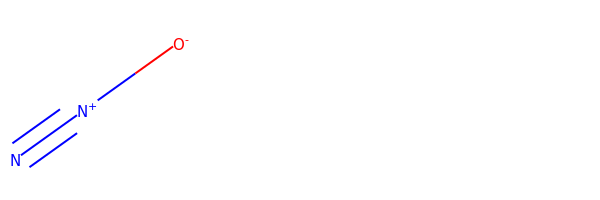

rdkit:  N#[N+][O-]
oechem:  N#[N+]O
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      128 matches
                                               [#6X4:1]-[#6X4:2] :       14 matches
                                               [#6X4:1]-[#6X3:2] :        5 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        4 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        9 matches
                                               [#6X3:1]-[#7X3:2] :        4 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        3 matches
                                    

                                           [*:1]~[#16X4:2]~[*:3] :        0 matches
                                   [*:1]-[#16X4,#16X3+0:2]-[*:3] :        0 matches
                           [*:1]~[#16X3$(*~[#8X1,#7X2]):2]~[*:3] :        0 matches
                                   [*:1]~[#16X2,#16X3+1:2]~[*:3] :        0 matches
                                           [*:1]=[#16X2:2]=[*:3] :        0 matches
                                     [#6X3:1]-[#16X2:2]-[#6X3:3] :        0 matches
                                     [#6X3:1]-[#16X2:2]-[#6X4:3] :        0 matches
                                       [#6X3:1]-[#16X2:2]-[#1:3] :        0 matches
                                             [*:1]~[#15:2]~[*:3] :        0 matches

114 angles added

PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :      334 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :      126 matches
                      

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :      128 matches
                                               [#6X4:1]-[#6X4:2] :       14 matches
                                               [#6X4:1]-[#6X3:2] :        5 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        4 matches
                                               [#6X3:1]-[#6X3:2] :        0 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        9 matches
                                               [#6X3:1]-[#7X3:2] :        4 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        3 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        2 match

                                         [*:1]~[*:2]~[*:3]~[*:4] :      334 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :      126 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        4 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :       44 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :       14 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 

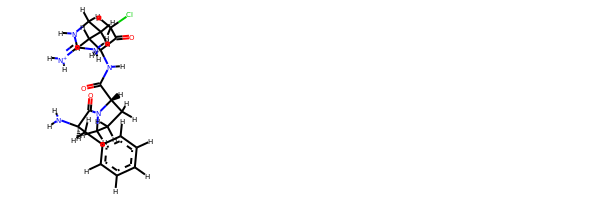

rdkit:  [H]c1c([H])c([H])c(C([H])([H])[C@]([H])(C(=O)N2C([H])([H])C([H])([H])C([H])([H])[C@@]2([H])C(=O)N([H])[C@]([H])(C(=O)C([H])([H])Cl)C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])N([H])[H])c([H])c1[H]
oechem:  c1ccc(cc1)C[C@H](C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCCNC(=[NH2+])N)C(=O)CCl)N
--------
Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       42 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        2 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                


PeriodicTorsionGenerator Propers:

                                         [*:1]~[*:2]~[*:3]~[*:4] :       88 matches
                                   [*:1]-[#6X4:2]-[#6X4:3]-[*:4] :        0 matches
                             [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#1:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#6X4:4] :        0 matches
                             [#8X2:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#9:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                               [#17:1]-[#6X4:2]-[#6X4:3]-[#17:4] :        0 matches
                               [#35:1]-[#6X4:2]-[#6X4:3]-[#35:4] :        0 matches
                               [#1:1]-[#6X4:2]-[#6X4:3]-[#8X2:4] :        0 matches
                                 [#1:1]-[#6X4:2]-[#6X4:3]-[#9:4] :        0 matches
                                [#1:1]-[

Charges specified in provided molecules will be used.

HarmonicBondGenerator:

                                                     [*:1]~[*:2] :       42 matches
                                               [#6X4:1]-[#6X4:2] :        0 matches
                                               [#6X4:1]-[#6X3:2] :        2 matches
                                      [#6X4:1]-[#6X3:2]=[#8X1+0] :        1 matches
                                               [#6X3:1]-[#6X3:2] :        2 matches
                                               [#6X3:1]:[#6X3:2] :       12 matches
                                               [#6X3:1]=[#6X3:2] :        0 matches
                                                   [#6:1]-[#7:2] :        0 matches
                                               [#6X3:1]-[#7X3:2] :        0 matches
                               [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0] :        0 matches
                                    [#6X3:1](=[#8X1+0])-[#7X3:2] :        0 match

                                    [*:1]~;!@[*;r5:2]~;@[*;r5:3] :        0 matches
                                        [#8X1:1]~[#6X3:2]~[#8:3] :        1 matches
                                            [*:1]~[#6X2:2]~[*:3] :        0 matches
                                [*:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :        0 matches
                               [#1:1]-[#7X4,#7X3,#7X2-1:2]-[*:3] :        0 matches
                     [*:1]~[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]~[*:3] :        0 matches
                    [#1:1]-[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]-[*:3] :        0 matches
                                            [*:1]~[#7X2:2]~[*:3] :        0 matches
                                          [*:1]~[#7X2+0:2]~[*:3] :        0 matches
                                         [#1:1]-[#7X2+0:2]~[*:3] :        0 matches
                         [#6,#7,#8:1]-[#7X3:2](~[#8X1])~[#8X1:3] :        0 matches
                                      [#8X1:1]~[#7X3:2]~[#8X1:3] :        0 

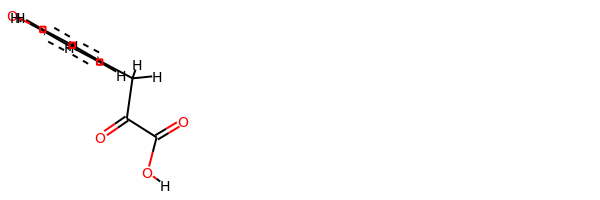

rdkit:  [H]OC(=O)C(=O)C([H])([H])c1c([H])c([H])c(O[H])c([H])c1[H]
oechem:  c1cc(ccc1CC(=O)C(=O)O)O
--------


In [11]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print("RDK parsing error")
        return False
#     print(Chem.MolToSmiles(rdkmol))
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol], verbose = True)
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol], verbose = True)

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
#     g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_oe, system_oe, system_oe, positions_oe, positions_oe, verbose = False,skip_assert = True)
    if(e1 == e2): return False
    for i in g1:
        print(i)
        print(g1[i], g2[i], g1[i] == g2[i])

    print( e1, e2)
    print('')
    return True

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuwang/remove_oeimplicityHydrogen.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()


counter = 0
writer = Chem.SDWriter('/home/shuwang/out.sdf')
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
#     rdkmol = Chem.MolFromMol2Block(mol2, sanitize = True, removeHs = False)
    rdkmol = Chem.MolFromMol2Block(mol2, sanitize = False, removeHs = False)
#     Chem.Kekulize(rdkmol)
    writeToFile = compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1

    
    print(Chem.MolToMolBlock(rdkmol)[0:21])
    x = Draw.MolsToGridImage([rdkmol], kekulize = False)
    display(x)
    print("rdkit: ", Chem.MolToSmiles(rdkmol, isomericSmiles = True))
    print("oechem: ", OEMolToSmiles(oemols_tripos[counter-1]))
    print("--------")
    writer.write(rdkmol)


In [20]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print("RDK parsing error")
        return False
#     print(Chem.MolToSmiles(rdkmol))
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol], verbose = True)
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol], verbose = True)

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
#     g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_oe, system_oe, system_oe, positions_oe, positions_oe, verbose = False,skip_assert = True)
    if(e1 == e2): return False
    for i in g1:
        print(i)
        print(g1[i], g2[i], g1[i] == g2[i])

    print( e1, e2)
    print('')
    return True

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuwang/remove_oeimplicityHydrogen.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()



# ofs = oemolostream("/home/shuwang/out.sdf")
# ofs.SetFormat(OEFormat_SDF)


counter = 0
suppl = Chem.SDMolSupplier('/home/shuwang/out.sdf',   removeHs = False, sanitize = False)

for mol2 in suppl:
    
# for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    print(counter)
    rdkmol = mol2
#     rdkmol = suppl[0]
    

#     x = Draw.MolsToGridImage([rdkmol], kekulize = False)
#     display(x)
    print(rdkmol)
    rdkmol.updatePropertyCache()
    writeToFile = compare_energies(rdkmol, oemols_tripos[counter])
    
#     OEWriteMolecule(ofs, oemols_tripos[counter])
    counter += 1
    
    
    

    
#     print(Chem.MolToMolBlock(rdkmol)[0:21])
#     x = Draw.MolsToGridImage([rdkmol], kekulize = False)
#     display(x)
#     print("rdkit: ", Chem.MolToSmiles(rdkmol, isomericSmiles = True))
#     print("oechem: ", OEMolToSmiles(oemols_tripos[counter-1]))
#     print("--------")

# ofs.close()


0


AttributeError: 'Mol' object has no attribute 'updatePropertyCache'

In [11]:
m = Chem.MolFromSmiles('c1c2ccnc2ccc1',False)
Draw.MolToFile(m,'temp.png',kekulize=False)

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2017.03.3
	BOOST: 1_56


In [17]:
mol2 = """@<TRIPOS>MOLECULE
DrugBank_3448
   33    33     0     0     0
SMALL
NO_CHARGES

@<TRIPOS>ATOM
      1 C5         -4.3466    4.1816    0.2815 C.ar      1 <0>         0.0000
      2 C4         -3.9099    2.9125    0.5675 C.ar      1 <0>         0.0000
      3 C8         -3.3447    3.1722   -4.6728 C.2       1 <0>         0.0000
      4 C7         -2.4608    2.3604   -4.0850 C.2       1 <0>         0.0000
      5 C9         -3.2878    3.3582   -6.1350 C.2       1 <0>         0.0000
      6 C10        -0.0437    1.9460   -2.2852 C.2       1 <0>         0.0000
      7 C1         -3.0484   -0.1138   -0.7992 C.3       1 <0>         0.0000
      8 C3         -1.6160    1.7811    0.2114 C.3       1 <0>         0.0000
      9 C6         -1.3563    1.1749   -2.2680 C.3       1 <0>         0.0000
     10 C2         -1.7158    0.6446   -0.8484 C.3       1 <0>         0.0000
     11 N2         -3.3304    4.9005   -0.2843 N.ar      1 <0>         0.0000
     12 N3         -2.2650    4.1106   -0.3610 N.ar      1 <0>         0.0000
     13 N1         -2.6146    2.9190    0.1501 N.pl3     1 <0>         0.0000
     14 N4         -2.3663    2.0783   -2.7946 N.pl3     1 <0>         0.0000
     15 O1         -4.0728    4.0898   -6.7263 O.2       1 <0>         0.0000
     16 O3          0.0640    3.1447   -2.0577 O.2       1 <0>         0.0000
     17 O4         -0.8807   -0.9925    0.9655 O.2       1 <0>         0.0000
     18 O5         -0.6563   -1.6201   -1.4937 O.2       1 <0>         0.0000
     19 O2          1.0198    1.1601   -2.5945 O.3       1 <0>         0.0000
     20 S1         -0.3916   -0.6212   -0.4046 S.o2      1 <0>         0.0000
     21 H7         -5.3232    4.6089    0.4513 H         1 <0>         0.0000
     22 H6         -4.3858    2.0487    1.0092 H         1 <0>         0.0000
     23 H11        -4.1069    3.7031   -4.1151 H         1 <0>         0.0000
     24 H10        -1.7041    1.8365   -4.6594 H         1 <0>         0.0000
     25 H12        -2.4989    2.8017   -6.6682 H         1 <0>         0.0000
     26 H1         -3.1043   -0.9099   -1.5500 H         1 <0>         0.0000
     27 H2         -3.2154   -0.5998    0.1688 H         1 <0>         0.0000
     28 H3         -3.8899    0.5649   -0.9748 H         1 <0>         0.0000
     29 H4         -1.7176    1.3435    1.2136 H         1 <0>         0.0000
     30 H5         -0.6040    2.2112    0.1980 H         1 <0>         0.0000
     31 H8         -1.2754    0.3457   -2.9820 H         1 <0>         0.0000
     32 H9         -3.0242    2.5111   -2.1539 H         1 <0>         0.0000
     33 H13         0.8146    0.2149   -2.7570 H         1 <0>         0.0000
@<TRIPOS>BOND
     1    1    2 2
     2    1   11 1
     3    2   13 1
     4    3    4 2
     5    3    5 1
     6    4   14 1
     7    5   15 2
     8    6    9 1
     9    6   16 2
    10    6   19 1
    11    7   10 1
    12    8   10 1
    13    8   13 1
    14    9   10 1
    15    9   14 1
    16   10   20 1
    17   11   12 2
    18   12   13 1
    19   17   20 2
    20   18   20 2
    21    1   21 1
    22    2   22 1
    23    3   23 1
    24    4   24 1
    25    5   25 1
    26    7   26 1
    27    7   27 1
    28    7   28 1
    29    8   29 1
    30    8   30 1
    31    9   31 1
    32   14   32 1
    33   19   33 1
    """
mol = Chem.MolFromMol2Block(mol2)
Chem.MolToSmiles(mol)

suppl = Chem.SDMolSupplier('/home/shuwang/out.sdf',  removeHs = False, sanitize = False)
qmol = Chem.MolFromSmarts("[*:1]~[*:2]")
for mol in suppl:
#     print(Chem.MolToSmiles(mol))
    for match in mol.GetSubstructMatches(qmol, uniquify = False):
        print(match)


(0, 1)
(0, 2)
(0, 21)
(1, 0)
(1, 3)
(1, 22)
(2, 0)
(2, 4)
(2, 23)
(3, 1)
(3, 8)
(3, 24)
(4, 2)
(4, 8)
(4, 25)
(5, 6)
(5, 10)
(5, 26)
(6, 5)
(6, 11)
(6, 27)
(7, 9)
(7, 11)
(7, 28)
(8, 3)
(8, 4)
(8, 12)
(9, 7)
(9, 10)
(9, 12)
(10, 5)
(10, 9)
(10, 16)
(11, 6)
(11, 7)
(11, 20)
(12, 8)
(12, 9)
(12, 17)
(13, 14)
(13, 16)
(13, 18)
(14, 13)
(14, 17)
(14, 29)
(14, 30)
(15, 18)
(15, 31)
(15, 32)
(15, 33)
(16, 10)
(16, 13)
(17, 12)
(17, 14)
(17, 19)
(18, 13)
(18, 15)
(18, 34)
(19, 17)
(20, 11)
(21, 0)
(22, 1)
(23, 2)
(24, 3)
(25, 4)
(26, 5)
(27, 6)
(28, 7)
(29, 14)
(30, 14)
(31, 15)
(32, 15)
(33, 15)
(34, 18)
(0, 2)
(0, 4)
(0, 7)
(1, 2)
(1, 8)
(1, 9)
(1, 10)
(2, 0)
(2, 1)
(2, 3)
(2, 11)
(3, 2)
(3, 12)
(3, 13)
(4, 0)
(5, 8)
(6, 8)
(7, 0)
(7, 14)
(8, 1)
(8, 5)
(8, 6)
(9, 1)
(10, 1)
(11, 2)
(12, 3)
(13, 3)
(14, 7)
(0, 3)
(0, 4)
(0, 8)
(1, 3)
(1, 5)
(1, 9)
(2, 5)
(2, 6)
(2, 7)
(3, 0)
(3, 1)
(4, 0)
(4, 5)
(5, 1)
(5, 2)
(5, 4)
(6, 2)
(6, 10)
(6, 11)
(7, 2)
(7, 12)
(7, 13)
(8, 0)
(9, 1)
(10, 6)
(11, 6)


AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'

In [32]:
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
# flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
# istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()
# print(oemols_tripos[0])
for atom in oemols_tripos[0].GetAtoms():
    print(atom.GetPartialCharge())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
